In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 数据分析

In [2]:
# 加载训练集和测试集
# 字段名
headers = ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']

# 加载训练集
training_raw = pd.read_csv('dataset/adult.data',
            names=headers,  #字段名/列名
            sep=",\s",  #以‘，空格’隔开
            na_values=["?"],  #数据集中是“？”的为空值  na_values：识别什么字符为空值
            engine="python") #以python解析
# 加载测试集
test_raw = pd.read_csv('dataset/adult.test',
            names=headers,
            sep=",\s",
            na_values=["?"],
            engine="python",
            skiprows=1)  #跳过第一行

In [3]:
training_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
training_raw.shape

(32561, 15)

In [5]:
test_raw.shape

(16281, 15)

In [6]:
# 训练集和测试集加到一起做分析
dataset_raw = training_raw.append(test_raw) #training_raw是一个DataFrame，DataFrame是可以追加的
dataset_raw.reset_index(inplace=True)  # 重置索引
dataset_raw.drop('index',inplace=True,axis=1)  # 删除原来index列

C:\Users\CRY03\AppData\Local\Temp\ipykernel_11872\2136409417.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_raw = training_raw.append(test_raw) #training_raw是一个DataFrame，DataFrame是可以追加的


In [7]:
dataset_raw.shape

(48842, 15)

In [8]:
32561 + 16281

48842

- 查看缺失值个数

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

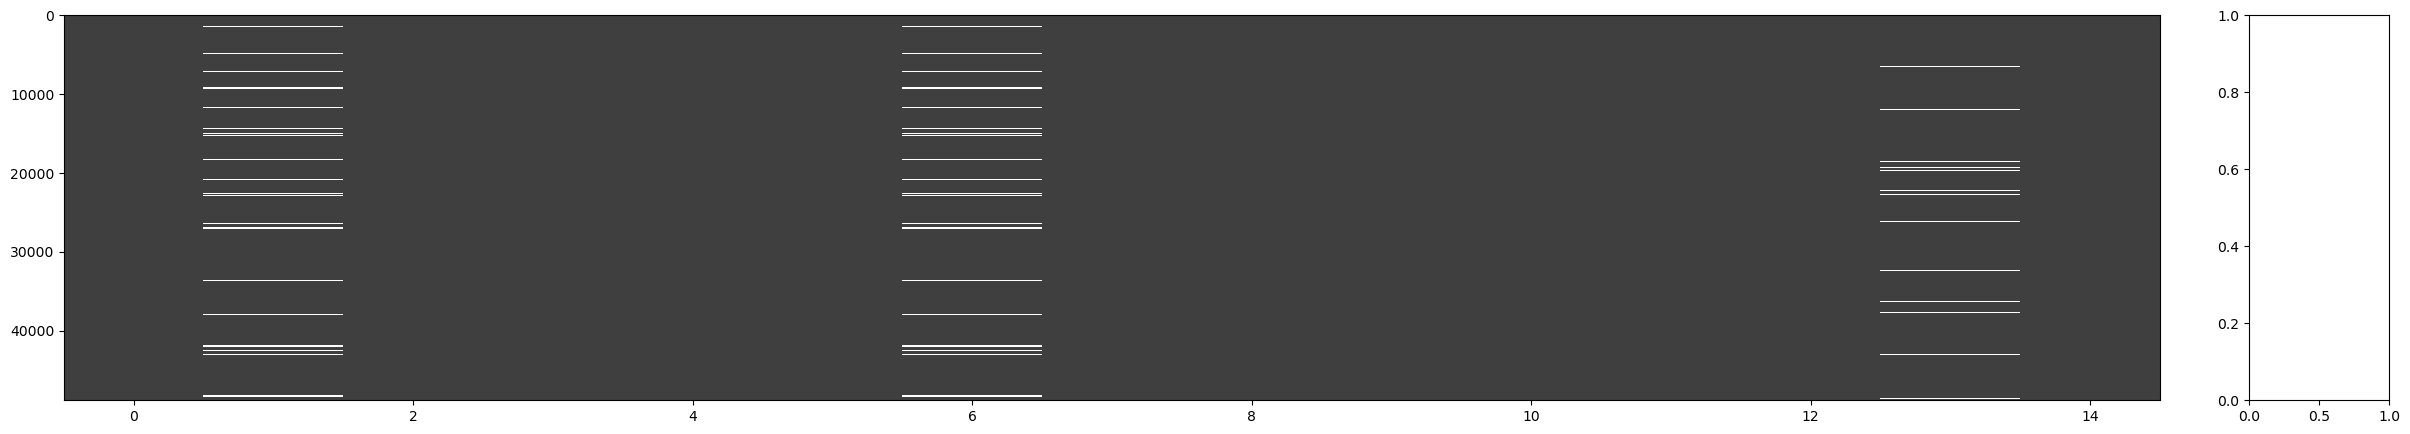

In [9]:
# 安装 pip install missingno
import missingno
missingno.matrix(dataset_raw,figsize=(30,5)) #以矩阵的形式

<Axes: >

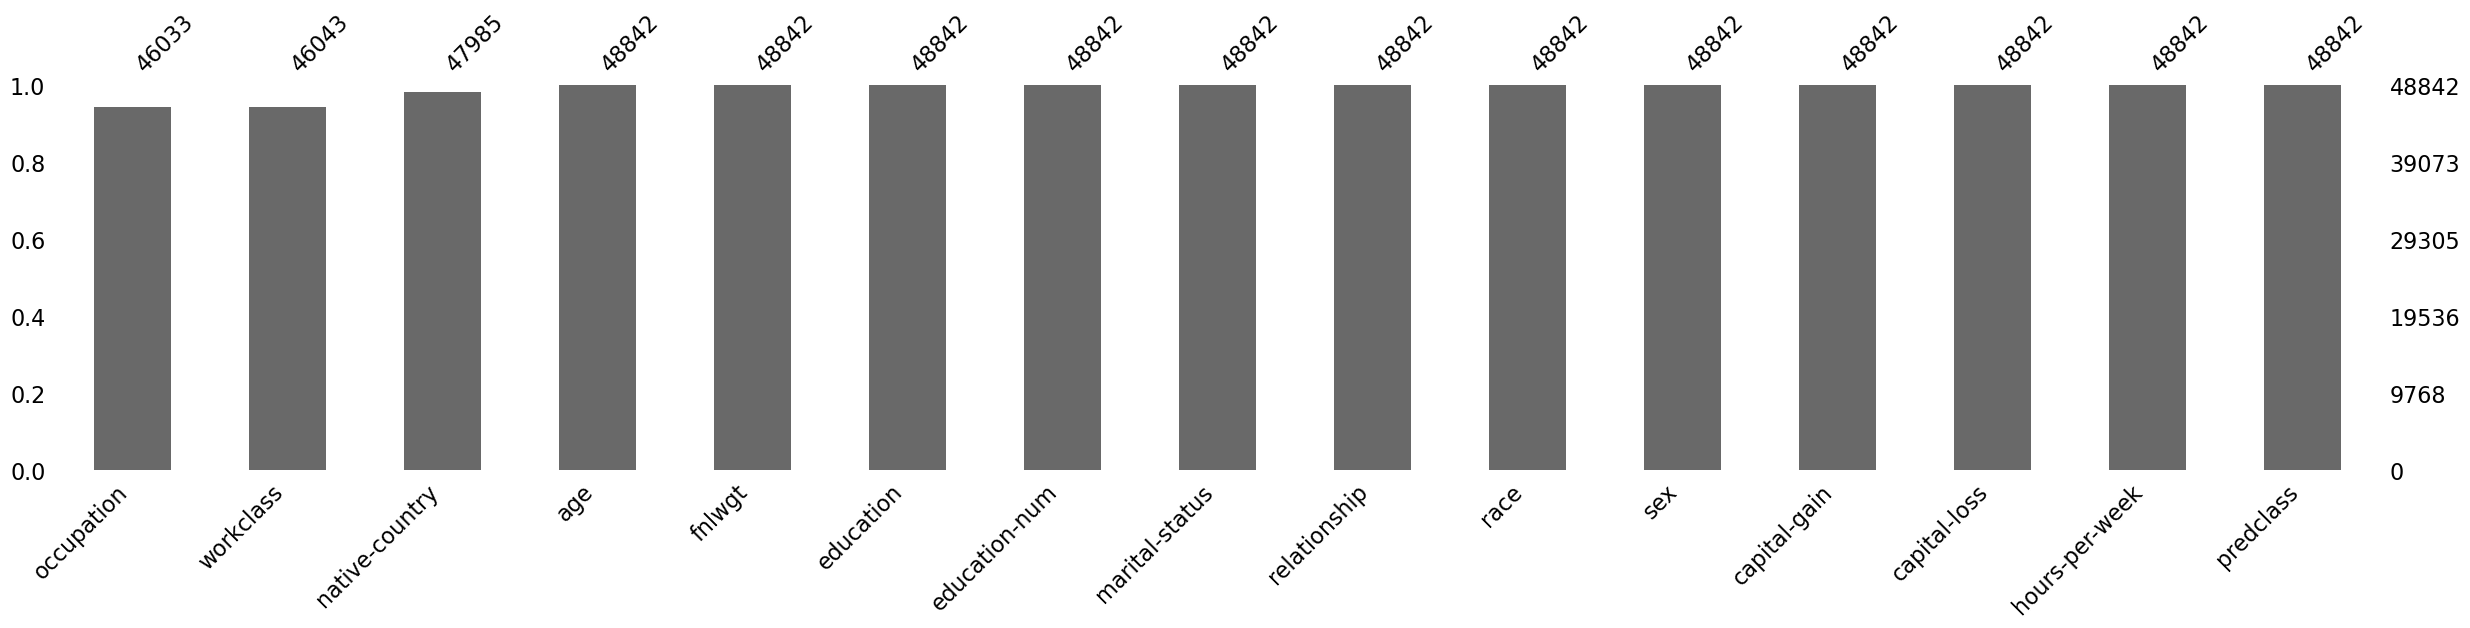

In [10]:
# 以条形统计图的方式查看缺失值
missingno.bar(dataset_raw,sort="ascending",figsize=(30,5))

- 显示所有数字型特征和标量型特征

In [16]:
# 显示所有数字型特征
dataset_raw.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
# 标量型特征(特别注意：include=['O']字母O，不是数字0)
dataset_raw.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,predclass
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [18]:
dataset_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- 绘制每个特征的分布

In [19]:
import math

# 绘制每个特征的分布  参数（数据集，列，宽，高，高距，宽距）
def plot_distribution(dataset,cols=5,width=20,height=15,hspace=0.2,wspace=0.5):
    plt.style.use('seaborn-whitegrid')  # 绘制风格 白网格
    fig = plt.figure(figsize=(width,height))  # 画布大小
    # 子图调整 上下左右都是None，就是设置图形的位置，边距
    fig.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=wspace,hspace=hspace) #为了好看
    #ceil：天花板。 取dataset的列，然后转换成float，除以我们的cols。 目的是求得我们要画多少行的图，例如求出来是3.5，我们就画4行
    rows = math.ceil(float(dataset.shape[1]) / cols)
    #以上都是准备工作
    
    for i,column in enumerate(dataset.columns):   # 遍历特征 （索引和列名） 每一列都是特征，所以我们遍历列就是遍历特征
        ax = fig.add_subplot(rows,cols,i+1)  # 每遍历一下我们添加一个子图，我们子图占多少行多少列就已经确定了
        ax.set_title(column)  # 设置标题

        if dataset.dtypes[column] == np.object:  # 判断列的数据类型  object指的是非数据型特征
            g = sns.countplot(y=column,data=dataset)  #画统计数量的条形图
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column]) #绘制分布图
            plt.xticks(rotation=25)


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

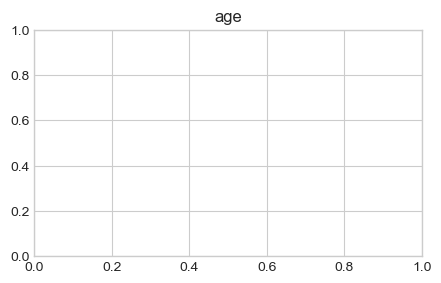

In [20]:
import warnings
warnings.filterwarnings('ignore') 
plot_distribution(dataset_raw,cols=3,width=20,height=20,hspace=0.45,wspace=0.5)

## 数据预处理和特征工程

In [16]:
# 创建新的DataFrame
dataset_bin = pd.DataFrame()  # 包含所有离散化后的值（分箱的） 分箱：将连续型特征离散化
dataset_con = pd.DataFrame()  # 包含所有未离散化的值（连续的）

- predclass标签属性  
预测目标：转换为0or1，年收入超过$50k记为1.

In [17]:
# 转换 #先对工资进行预处理
dataset_raw.loc[dataset_raw['predclass']=='>50K','predclass'] = 1
dataset_raw.loc[dataset_raw['predclass']=='>50K.','predclass'] = 1
dataset_raw.loc[dataset_raw['predclass']=='<=50K','predclass'] = 0
dataset_raw.loc[dataset_raw['predclass']=='<=50K.','predclass'] = 0

# 存储到两个DataFrame中
dataset_bin['predclass'] = dataset_raw['predclass']
dataset_con['predclass'] = dataset_raw['predclass']

<AxesSubplot:xlabel='count', ylabel='predclass'>

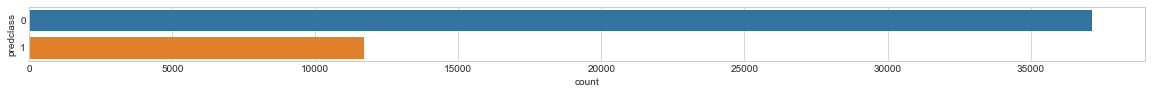

In [18]:
plt.style.use('seaborn-whitegrid') #绘制绘图风格
fig = plt.figure(figsize=(20,1)) 
sns.countplot(y='predclass',data=dataset_raw)

- 特征age

In [19]:
dataset_bin['age'] = pd.cut(dataset_raw['age'],10)  # 分箱离散化
dataset_con['age'] = dataset_raw['age'] # 未离散化

<AxesSubplot:xlabel='count', ylabel='age'>

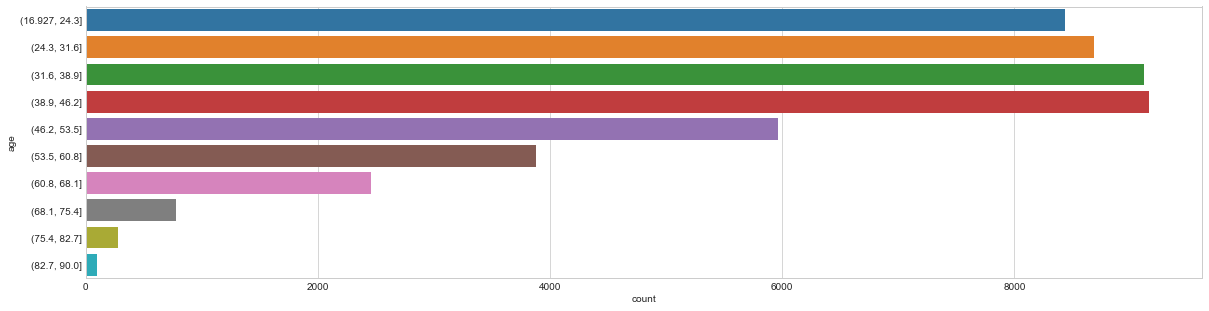

In [20]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5))
sns.countplot(y='age',data=dataset_bin)  #分箱后的结果

<AxesSubplot:xlabel='age', ylabel='Density'>

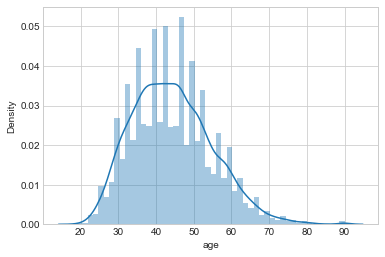

In [21]:
# 带趋势线的直方图   年薪>50K的人
sns.distplot(dataset_con.loc[dataset_con['predclass']==1]['age']) # 高收入趋势图

<AxesSubplot:xlabel='age', ylabel='Density'>

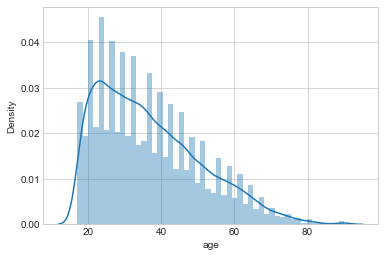

In [22]:
# 带趋势线的直方图
sns.distplot(dataset_con.loc[dataset_con['predclass']==0]['age']) # 低收入趋势图

- 特征workclass

<AxesSubplot:xlabel='count', ylabel='workclass'>

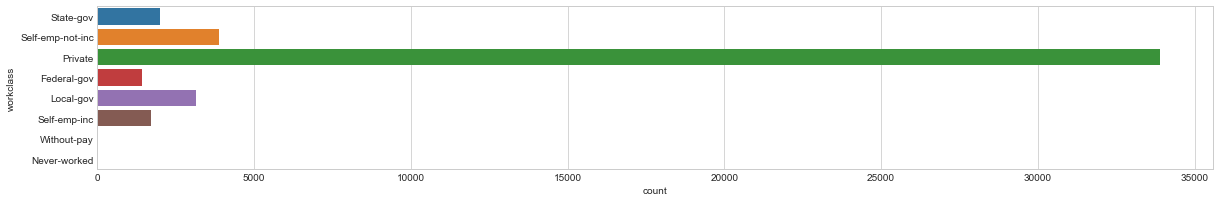

In [23]:
#工作种类
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,3))
sns.countplot(y='workclass',data=dataset_raw)

- workclass工薪阶层
- self-emp=self employment自由职业者
- Private 个人，私人
- inc 股份有限公司
- Federal-gov 联邦政府
- Local-gov 地方政府
- State-gov 州政府
- Without-pay 无薪（水）
- Never-worked 没工作经验

In [24]:
# 减少类别数目

# 无薪水-没工作经验的
dataset_raw.loc[dataset_raw['workclass']=='Without-pay','workclass'] = 'Not Working'
dataset_raw.loc[dataset_raw['workclass']=='Never-worked','workclass'] = 'Not Working'
# 联邦政府工作
dataset_raw.loc[dataset_raw['workclass']=='Federal-gov','workclass'] = 'Fed-gov'
#非联邦政府工作 1.州政府 2.地方政府
dataset_raw.loc[dataset_raw['workclass']=='State-gov','workclass'] = 'Non-fed-gov'
dataset_raw.loc[dataset_raw['workclass']=='Local-gov','workclass'] = 'Non-fed-gov'
#自由职业者
dataset_raw.loc[dataset_raw['workclass']=='Self-emp-not-inc','workclass'] = 'Self-emp'
dataset_raw.loc[dataset_raw['workclass']=='Self-emp-inc','workclass'] = 'Self-emp'

# 存储记录
dataset_bin['workclass'] = dataset_raw['workclass']
dataset_con['workclass'] = dataset_raw['workclass']

<AxesSubplot:xlabel='count', ylabel='workclass'>

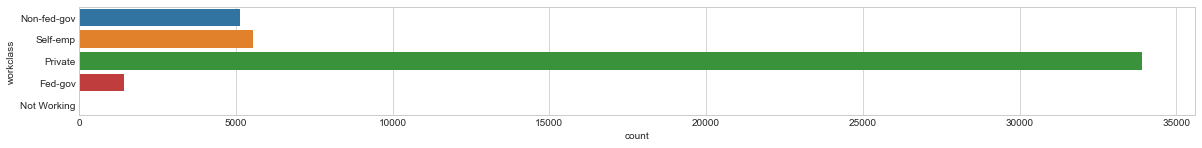

In [25]:
# 合并工作类别后绘图
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,2))
sns.countplot(y='workclass',data=dataset_raw)

- 特征occupation

<AxesSubplot:xlabel='count', ylabel='occupation'>

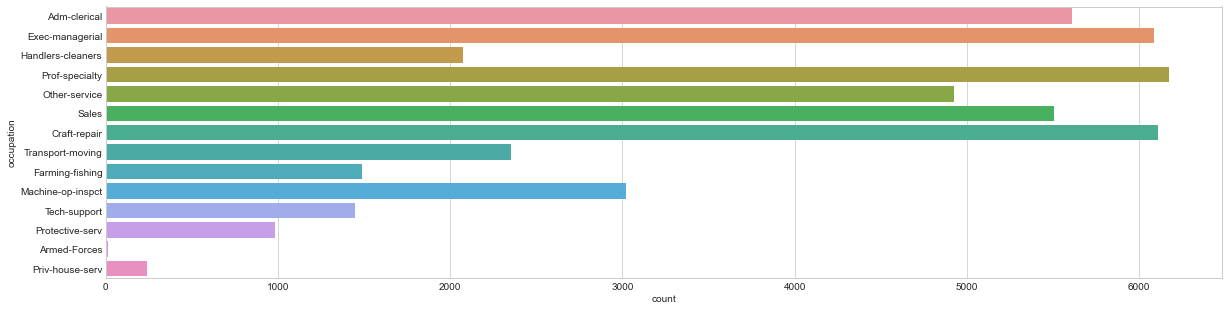

In [26]:
# occupation 职位
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
sns.countplot(y="occupation", data=dataset_raw)

In [27]:
dataset_raw['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [28]:
# 属性融合

#Adm-clerical：行政管理
dataset_raw.loc[dataset_raw['occupation'] == 'Adm-clerical', 'occupation'] = 'Admin'
#Military：军事  Protective-serv：保护服务  Armed-Forces：武装部队
dataset_raw.loc[dataset_raw['occupation'] == 'Armed-Forces', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] == 'Protective-serv', 'occupation'] = 'Military'
#Craft-repair：工艺维修  Farming-fishing：农业捕鱼 Handlers-cleaners：搬运工-清洁工  Machine-op-inspct：机器操作员/接线员
#Transport-moving：运输搬家   Manual Labour：体力活
dataset_raw.loc[dataset_raw['occupation'] == 'Craft-repair', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Farming-fishing', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Handlers-cleaners', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Machine-op-inspct', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Transport-moving', 'occupation'] = 'Manual Labour'
#Other-service：其他服务  Priv-house-serv：私人房屋服务   Service：服务
dataset_raw.loc[dataset_raw['occupation'] == 'Other-service', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] == 'Priv-house-serv', 'occupation'] = 'Service'
#Prof-specialty：教授专业  Professional：专业
dataset_raw.loc[dataset_raw['occupation'] == 'Prof-specialty', 'occupation'] = 'Professional'
#Sales：销售  Tech-support：技术支持  Exec-managerial：执行管理团队  Office Labour：办公室劳动 
dataset_raw.loc[dataset_raw['occupation'] == 'Sales', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Tech-support', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Exec-managerial', 'occupation'] = 'Office Labour'


dataset_bin['occupation'] = dataset_raw['occupation']
dataset_con['occupation'] = dataset_raw['occupation']

<AxesSubplot:xlabel='count', ylabel='occupation'>

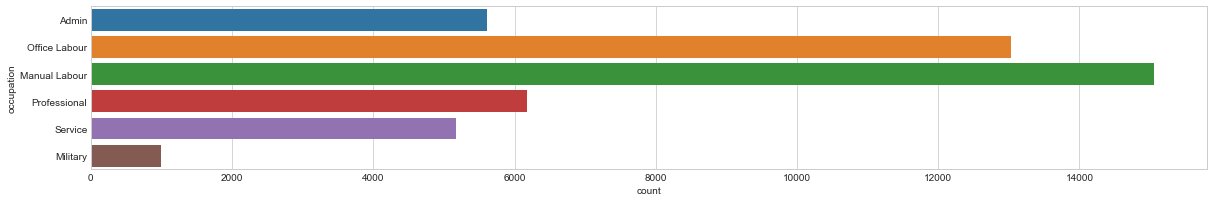

In [29]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,3))
sns.countplot(y="occupation", data=dataset_bin)

- 特征native country

<AxesSubplot:xlabel='count', ylabel='native-country'>

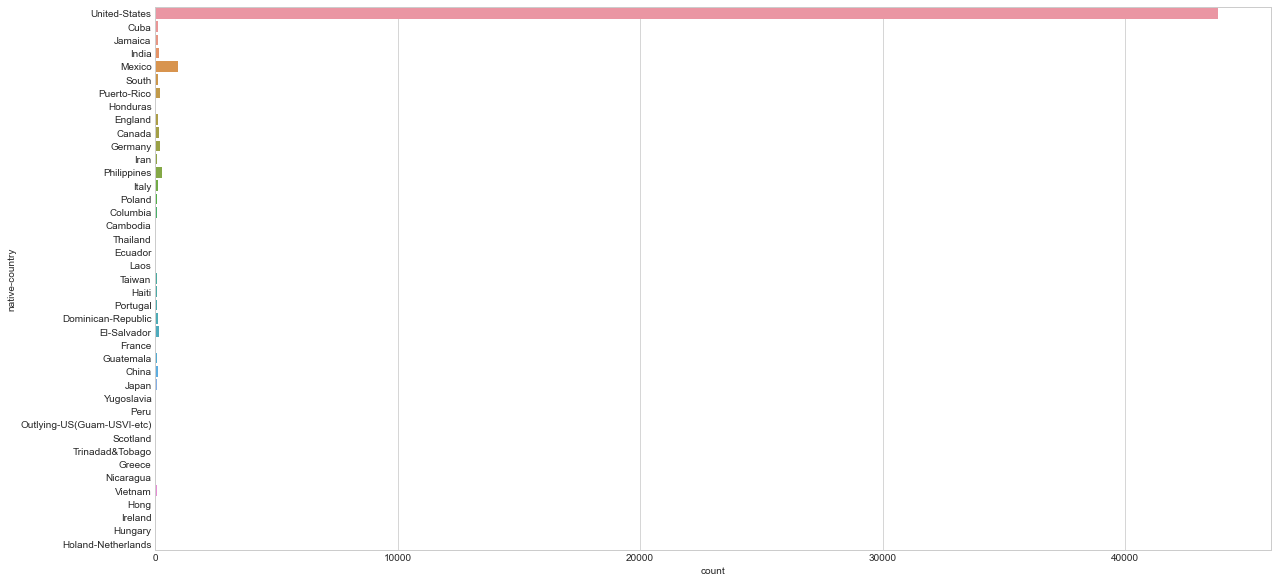

In [30]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.countplot(y="native-country", data=dataset_raw)

In [31]:
dataset_raw['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

- SE-Asia：东南亚
- British-Commonwealth：英联邦
- South-America：南亚美利加洲
- Euro：欧盟
- APAC：亚太地区

In [32]:
dataset_raw.loc[dataset_raw['native-country'] == 'Cambodia'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Canada'                      , 'native-country'] = 'British-Commonwealth'    
dataset_raw.loc[dataset_raw['native-country'] == 'China'                       , 'native-country'] = 'China'       
dataset_raw.loc[dataset_raw['native-country'] == 'Columbia'                    , 'native-country'] = 'South-America'    
dataset_raw.loc[dataset_raw['native-country'] == 'Cuba'                        , 'native-country'] = 'South-America'        
dataset_raw.loc[dataset_raw['native-country'] == 'Dominican-Republic'          , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Ecuador'                     , 'native-country'] = 'South-America'     
dataset_raw.loc[dataset_raw['native-country'] == 'El-Salvador'                 , 'native-country'] = 'South-America' 
dataset_raw.loc[dataset_raw['native-country'] == 'England'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'France'                      , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Germany'                     , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Greece'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Guatemala'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Haiti'                       , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Holand-Netherlands'          , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Honduras'                    , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Hong'                        , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Hungary'                     , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'India'                       , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Iran'                        , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Ireland'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Italy'                       , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Jamaica'                     , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Japan'                       , 'native-country'] = 'APAC'
dataset_raw.loc[dataset_raw['native-country'] == 'Laos'                        , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Mexico'                      , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Nicaragua'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Outlying-US(Guam-USVI-etc)'  , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Peru'                        , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Philippines'                 , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Poland'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Portugal'                    , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Puerto-Rico'                 , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Scotland'                    , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'South'                       , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Taiwan'                      , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Thailand'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Trinadad&Tobago'             , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'United-States'               , 'native-country'] = 'United-States'
dataset_raw.loc[dataset_raw['native-country'] == 'Vietnam'                     , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Yugoslavia'                  , 'native-country'] = 'Euro_Group_2'

dataset_bin['native-country'] = dataset_raw['native-country']
dataset_con['native-country'] = dataset_raw['native-country']

<AxesSubplot:xlabel='count', ylabel='native-country'>

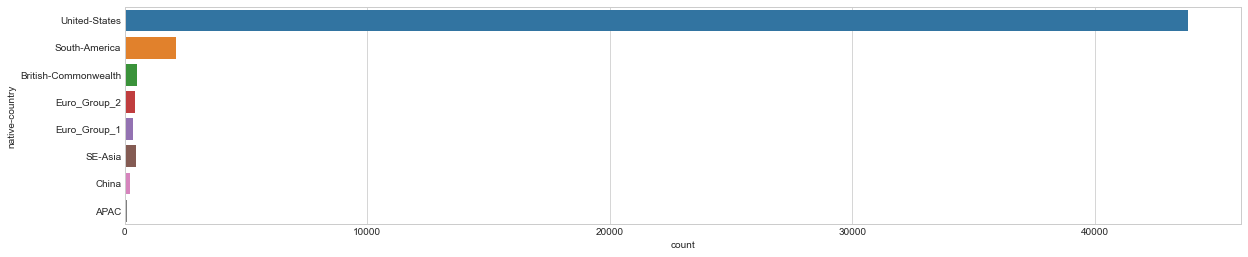

In [33]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="native-country", data=dataset_bin)

- 特征education

<AxesSubplot:xlabel='count', ylabel='education'>

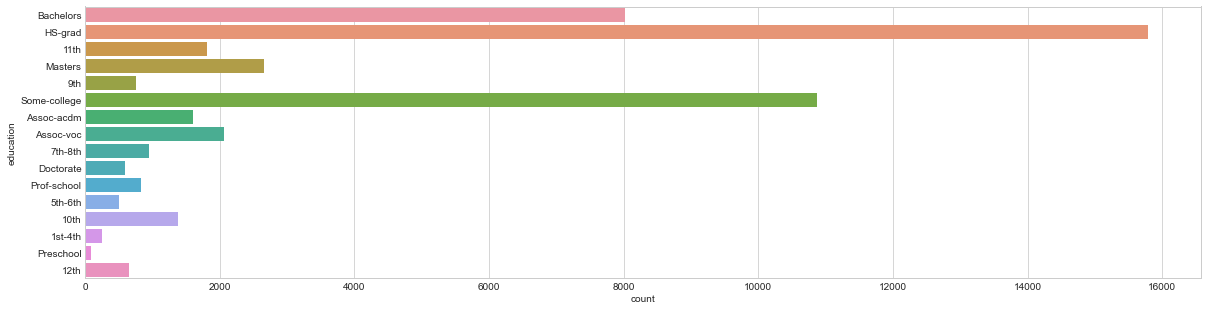

In [34]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
sns.countplot(y="education", data=dataset_raw)

In [35]:
dataset_raw['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

- Associate:副学士
- Bachelors：学士
- Doctorate：博士
- HS-Graduate：研究生
- Masters：硕士
- Professor：教授
- Graduate：毕业生

In [36]:
dataset_raw.loc[dataset_raw['education'] == '10th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '11th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '12th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '1st-4th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '5th-6th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '7th-8th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '9th'           , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-acdm'    , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-voc'     , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Bachelors'     , 'education'] = 'Bachelors'
dataset_raw.loc[dataset_raw['education'] == 'Doctorate'     , 'education'] = 'Doctorate'
dataset_raw.loc[dataset_raw['education'] == 'HS-Grad'       , 'education'] = 'HS-Graduate'
dataset_raw.loc[dataset_raw['education'] == 'Masters'       , 'education'] = 'Masters'
dataset_raw.loc[dataset_raw['education'] == 'Preschool'     , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Prof-school'   , 'education'] = 'Professor'
dataset_raw.loc[dataset_raw['education'] == 'Some-college'  , 'education'] = 'HS-Graduate'

dataset_bin['education'] = dataset_raw['education']
dataset_con['education'] = dataset_raw['education']

<AxesSubplot:xlabel='count', ylabel='education'>

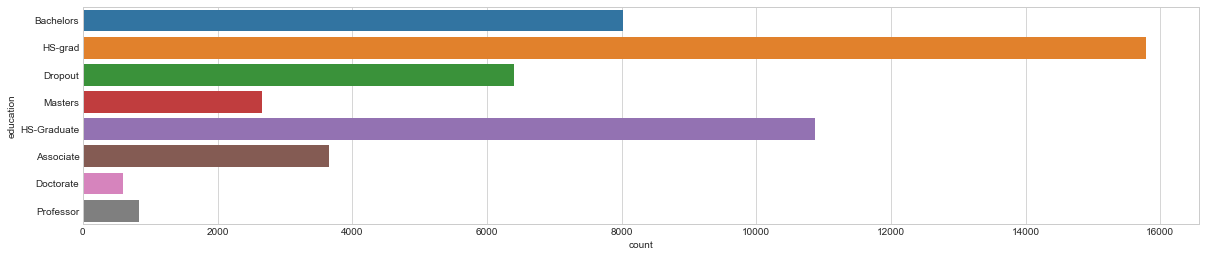

In [37]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="education", data=dataset_bin)

- 特征Marital Status

<AxesSubplot:xlabel='count', ylabel='marital-status'>

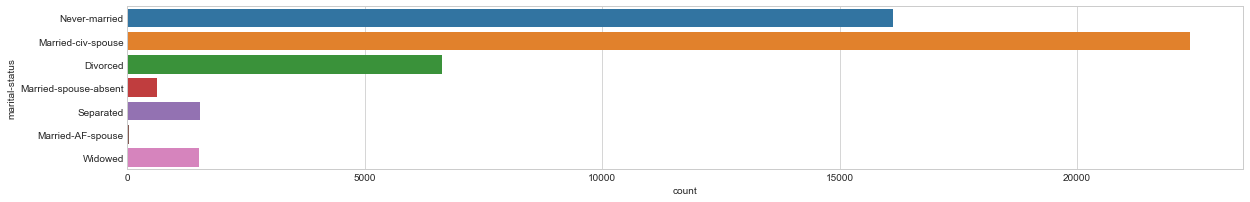

In [38]:
plt.figure(figsize=(20,3)) 
sns.countplot(y="marital-status", data=dataset_raw)

In [39]:
dataset_raw['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

- Never-Married:未婚
- Married：已婚
- Married-spouse-absent：已婚-配偶-寄了
- Separated：离婚
- Widowed：寡

In [40]:
dataset_raw.loc[dataset_raw['marital-status'] == 'Never-married'        , 'marital-status'] = 'Never-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-AF-spouse'    , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-civ-spouse'   , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-spouse-absent', 'marital-status'] = 'Not-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Separated'            , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Divorced'             , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Widowed'              , 'marital-status'] = 'Widowed'

dataset_bin['marital-status'] = dataset_raw['marital-status']
dataset_con['marital-status'] = dataset_raw['marital-status']

<AxesSubplot:xlabel='count', ylabel='marital-status'>

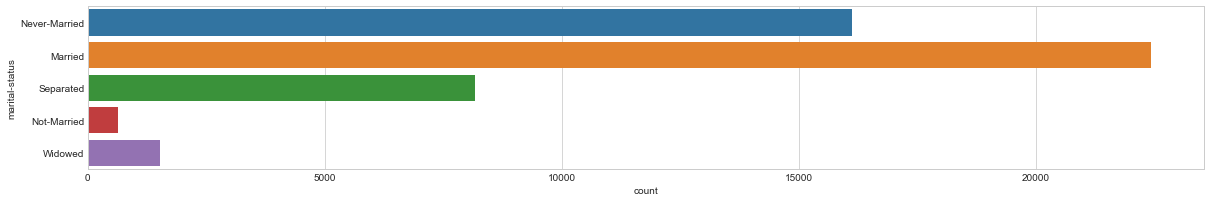

In [41]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,3)) 
sns.countplot(y="marital-status", data=dataset_bin)

- 特征Final Weight

In [42]:
# 体重分箱
dataset_bin['fnlwgt'] = pd.cut(dataset_raw['fnlwgt'], 10)
dataset_con['fnlwgt'] = dataset_raw['fnlwgt']  # 未离散化

<AxesSubplot:xlabel='count', ylabel='fnlwgt'>

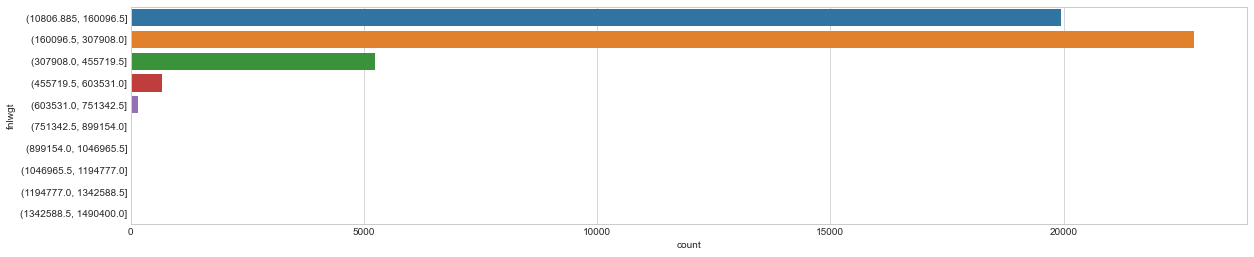

In [43]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="fnlwgt", data=dataset_bin) #拿分箱的结果画图

- 特征Education Number

<AxesSubplot:xlabel='count', ylabel='education-num'>

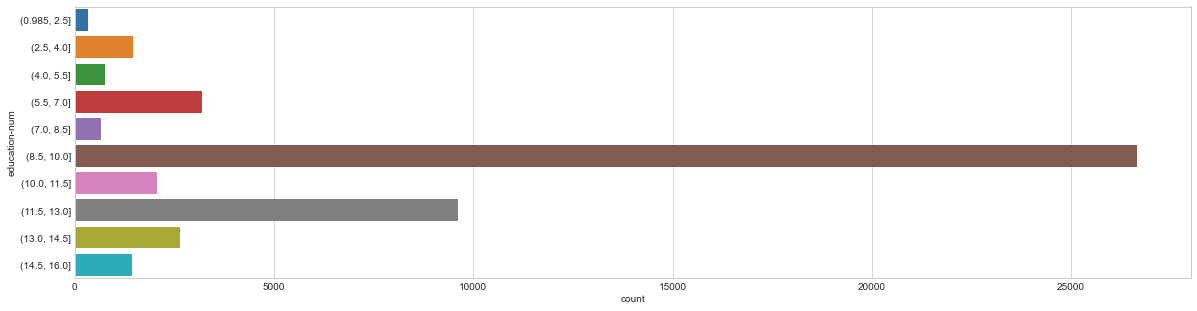

In [44]:
#教育年限
dataset_bin['education-num'] = pd.cut(dataset_raw['education-num'], 10) # 分箱离散化
dataset_con['education-num'] = dataset_raw['education-num'] # 未离散化

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y="education-num", data=dataset_bin)

- 特征Hours per Week

<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

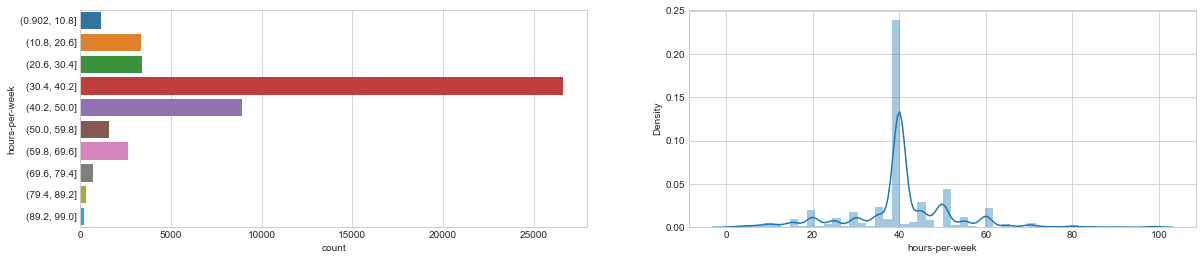

In [45]:
# 周工作时间（小时）分箱
dataset_bin['hours-per-week'] = pd.cut(dataset_raw['hours-per-week'], 10) #对连续型数据进行分箱
dataset_con['hours-per-week'] = dataset_raw['hours-per-week']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
plt.subplot(1, 2, 1)

sns.countplot(y="hours-per-week", data=dataset_bin) 
plt.subplot(1, 2, 2)

sns.distplot(dataset_con['hours-per-week'])

- Capital Gain

<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

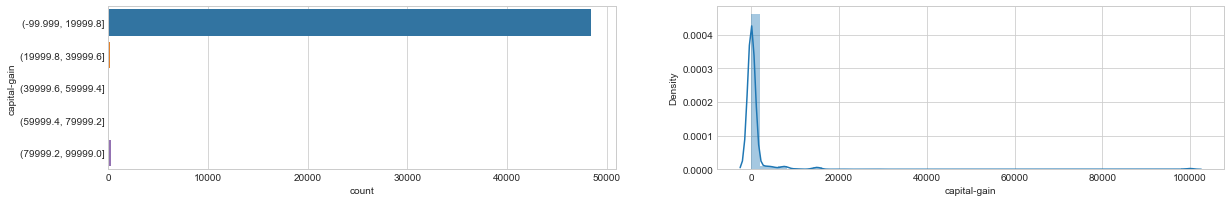

In [46]:
#收入
dataset_bin['capital-gain'] = pd.cut(dataset_raw['capital-gain'], 5)

dataset_con['capital-gain'] = dataset_raw['capital-gain']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,3)) 
plt.subplot(1, 2, 1)
sns.countplot(y="capital-gain", data=dataset_bin);
plt.subplot(1, 2, 2)
sns.distplot(dataset_con['capital-gain'])

- 特征Capital Loss

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

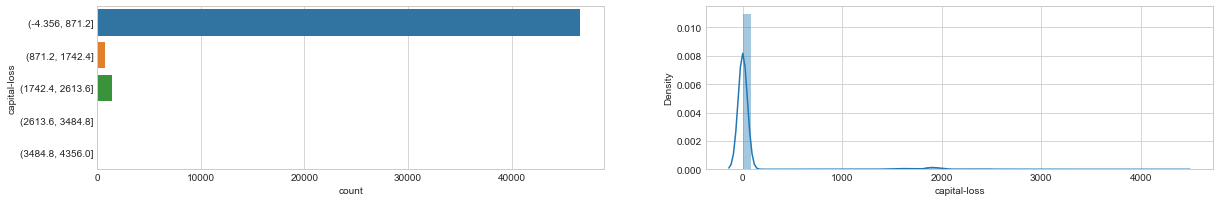

In [47]:
#支出
dataset_bin['capital-loss'] = pd.cut(dataset_raw['capital-loss'], 5)
dataset_con['capital-loss'] = dataset_raw['capital-loss']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,3)) 
plt.subplot(1, 2, 1)
sns.countplot(y="capital-loss", data=dataset_bin)
plt.subplot(1, 2, 2)
sns.distplot(dataset_con['capital-loss'])

- 特征Race, Sex, Relationship

In [48]:
# 无需处理  Race：种族  Sex:性别  relationship：家庭的关系
dataset_con['sex'] = dataset_bin['sex'] = dataset_raw['sex']
dataset_con['race'] = dataset_bin['race'] = dataset_raw['race']
dataset_con['relationship'] = dataset_bin['relationship'] = dataset_raw['relationship']

In [49]:
dataset_con.head()

,predclass,age,workclass,occupation,native-country,education,marital-status,fnlwgt,education-num,hours-per-week,capital-gain,capital-loss,sex,race,relationship
0,0,39,Non-fed-gov,Admin,United-States,Bachelors,Never-Married,77516,13,40,2174,0,Male,White,Not-in-family
1,0,50,Self-emp,Office Labour,United-States,Bachelors,Married,83311,13,13,0,0,Male,White,Husband
2,0,38,Private,Manual Labour,United-States,HS-grad,Separated,215646,9,40,0,0,Male,White,Not-in-family
3,0,53,Private,Manual Labour,United-States,Dropout,Married,234721,7,40,0,0,Male,Black,Husband
4,0,28,Private,Professional,South-America,Bachelors,Married,338409,13,40,0,0,Female,Black,Wife


In [50]:
# 警告处理 
import warnings
warnings.filterwarnings('ignore')  

# 特征选择和编码
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# 机器学习
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# 网格搜索、随机搜索
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 模型度量（分类）
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

#### 特征衍生

<AxesSubplot:xlabel='age-hours', ylabel='Density'>

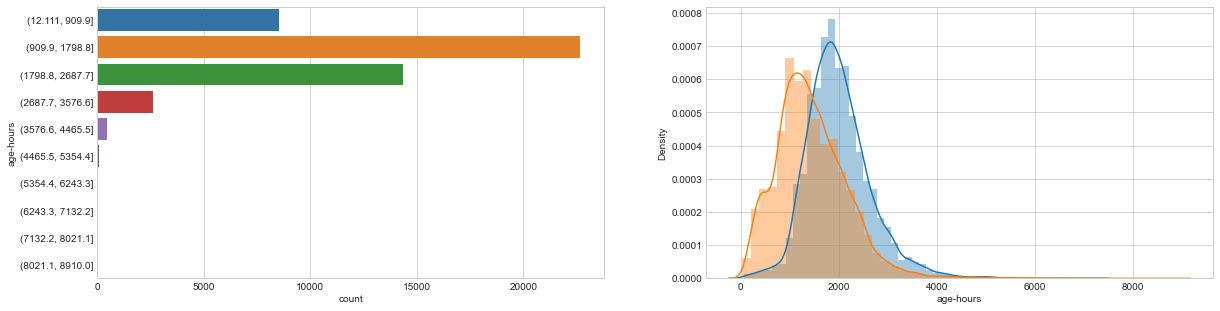

In [51]:
# 连续型特征衍生(age与hours per week共同衍生的特征)
dataset_con['age-hours'] = dataset_con['age'] * dataset_con['hours-per-week']
dataset_bin['age-hours'] = pd.cut(dataset_con['age-hours'],10) #分箱

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(y='age-hours',data=dataset_bin)  # 绘制横向数量统计图
plt.subplot(1,2,2)
# 连续型衍生特征的趋势图
sns.distplot(dataset_con.loc[dataset_con['predclass']==1]['age-hours'])
sns.distplot(dataset_con.loc[dataset_con['predclass']==0]['age-hours'])

<AxesSubplot:xlabel='count', ylabel='sex-marital'>

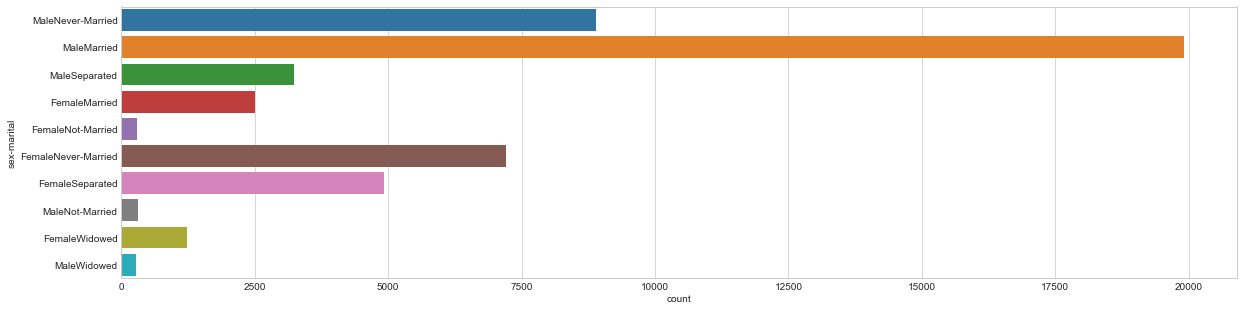

In [52]:
# 离散型特征衍生(sex与marital-status共同衍生的特征)
dataset_bin['sex-marital'] = dataset_con['sex-marital'] = dataset_bin['sex'] + dataset_bin['marital-status']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5))
sns.countplot(y='sex-marital',data=dataset_bin)


In [53]:
dataset_bin.shape

(48842, 17)

In [54]:
dataset_con.shape

(48842, 17)

In [55]:
#缺失值去除
dataset_bin = dataset_bin.dropna(axis=0)
dataset_con = dataset_con.dropna(axis=0)

In [56]:
dataset_bin.shape

(45222, 17)

In [57]:
dataset_con.shape

(45222, 17)

#### 特征编码

In [58]:
# 所有离散型特征进行one-hot编码
one_hot_cols = dataset_bin.columns.tolist()
one_hot_cols.remove('predclass')  # 不对标签列进行编码

# One-Hot编码
dataset_bin_enc = pd.get_dummies(dataset_bin,columns=one_hot_cols)
dataset_bin_enc.head()

,predclass,"age_(16.927, 24.3]","age_(24.3, 31.6]","age_(31.6, 38.9]","age_(38.9, 46.2]","age_(46.2, 53.5]","age_(53.5, 60.8]","age_(60.8, 68.1]","age_(68.1, 75.4]","age_(75.4, 82.7]",...,sex-marital_FemaleMarried,sex-marital_FemaleNever-Married,sex-marital_FemaleNot-Married,sex-marital_FemaleSeparated,sex-marital_FemaleWidowed,sex-marital_MaleMarried,sex-marital_MaleNever-Married,sex-marital_MaleNot-Married,sex-marital_MaleSeparated,sex-marital_MaleWidowed
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [59]:
# 所有连续型特征进行Label-encoding编码

encoder = LabelEncoder()
dataset_con = dataset_con.astype(str) # 转换为字符串类型
dataset_con_enc = dataset_con.apply(encoder.fit_transform) #fit_transform 先拟合再转换

In [60]:
dataset_con_enc.head()

,predclass,age,workclass,occupation,native-country,education,marital-status,fnlwgt,education-num,hours-per-week,capital-gain,capital-loss,sex,race,relationship,age-hours,sex-marital
0,0,22,1,0,7,1,1,25244,4,34,34,0,1,4,1,242,6
1,0,33,4,3,7,1,0,25556,4,4,0,0,1,4,0,1220,5
2,0,21,3,1,7,5,3,12575,15,34,0,0,1,4,1,228,8
3,0,36,3,1,7,3,0,14166,13,34,0,0,1,2,0,466,5
4,0,11,3,4,6,1,0,19962,4,34,0,0,0,2,5,58,0


## 降维

- 查看特征之间的相关性

NameError: name 'dataset_bin_enc' is not defined

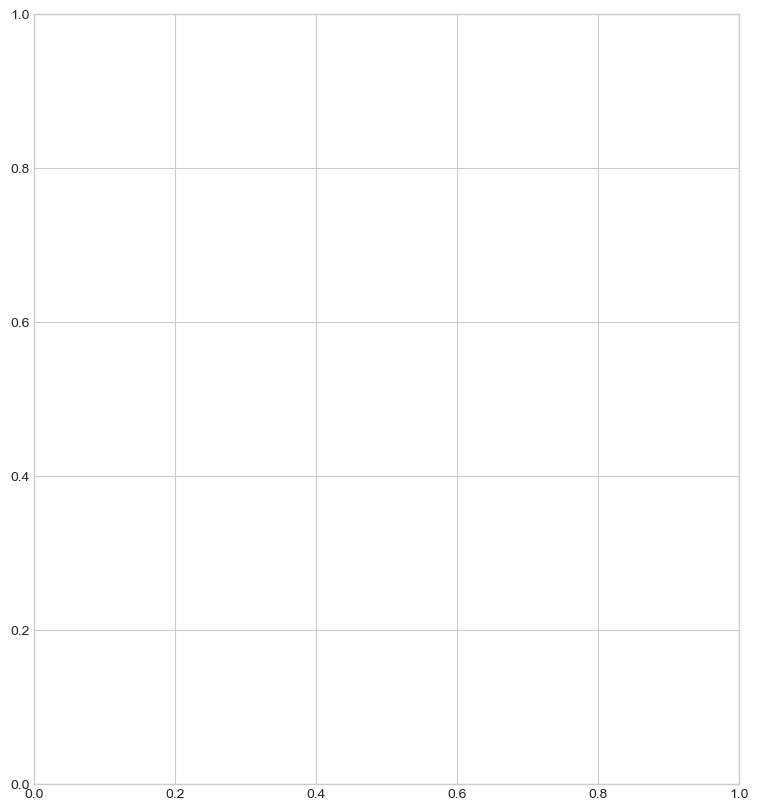

In [21]:
# 绘制两个数据集的热力图
plt.style.use('seaborn-whitegrid')  # 设置绘图风格
fig = plt.figure(figsize=(20,10))

# 绘制第一个热力图
plt.subplot(1,2,1)  # 设置子图，1行2列第一个子图
# 根据dataset_bin_enc的特征相关性，创建布尔型数组
mask = np.zeros_like(dataset_bin_enc.corr(),dtype=np.bool)  
# 将mask中上三角矩阵的索引位置的值设置为True(目的是绘图时将上三角部分隐藏)
mask[np.triu_indices_from(mask)] = True  
# 绘制特征关系热力图
sns.heatmap(dataset_bin_enc.corr(),  #离散型的数据
            vmin=-1,vmax=1,
            square=True,
            cmap=sns.color_palette("RdBu_r",100),
            mask=mask,    #去掉上三角
            linewidths=.5)

# 绘制第二个热力图
plt.subplot(1,2,2)  # 设置子图，1行2列第二个子图
# 根据dataset_bin_enc的特征相关性，创建布尔型数组
mask = np.zeros_like(dataset_con_enc.corr(),dtype=np.bool)  
# 将mask中上三角矩阵的索引位置的值设置为True(目的是绘图时将上三角部分隐藏)
mask[np.triu_indices_from(mask)] = True  
# 绘制特征关系热力图
sns.heatmap(dataset_con_enc.corr(),
            vmin=-1,vmax=1,
            square=True,
            cmap=sns.color_palette("RdBu_r",100),
            mask=mask,
            linewidths=.5)

#### PCA降维（详细见机器学习部分）

In [62]:
dataset_con_enc.shape

(45222, 17)

In [63]:
dataset_bin_enc.shape

(45222, 116)

In [64]:
# 假如降到10维（保留10个特征）
X = dataset_bin_enc.drop('predclass',axis=1)  # 提取特征（不包含标签）

pca = PCA(n_components=10)  # 设置保留10个特征
X_reduction =  pca.fit_transform(X) # 降维

In [65]:
X_reduction.shape

(45222, 10)

#### 建模与评估

- 选择数据集

In [66]:
# 第一个可选的数据集：dataset_bin_enc(离散编码)
# 第二个可选的数据集：dataset_con_enc(连续编码)

selected_dataset = dataset_con_enc
selected_dataset.head()

,predclass,age,workclass,occupation,native-country,education,marital-status,fnlwgt,education-num,hours-per-week,capital-gain,capital-loss,sex,race,relationship,age-hours,sex-marital
0,0,22,1,0,7,1,1,25244,4,34,34,0,1,4,1,242,6
1,0,33,4,3,7,1,0,25556,4,4,0,0,1,4,0,1220,5
2,0,21,3,1,7,5,3,12575,15,34,0,0,1,4,1,228,8
3,0,36,3,1,7,3,0,14166,13,34,0,0,1,2,0,466,5
4,0,11,3,4,6,1,0,19962,4,34,0,0,0,2,5,58,0


- 拆分数据集

In [67]:
train = selected_dataset.loc[:32560,:]  # 训练样本
test = selected_dataset.loc[32561:,:]  # 测试样本

In [68]:
train.shape

(30162, 17)

In [69]:
test.shape

(15060, 17)

In [70]:
# 算法开始之前重命名特征和标签
X_train = train.drop('predclass',axis=1)  # 训练样本集特征（删除掉标签列）
y_train = train['predclass'].astype('int64')  # 训练样本集标签

X_test = test.drop('predclass',axis=1)  # 测试样本集特征（删除掉标签列）
y_test = test['predclass'].astype('int64')  # 测试样本集标签

- 选择算法（以逻辑回归为例）

In [71]:
log_reg = LogisticRegression()  # 选择逻辑回归模型
log_reg.fit(X_train,y_train)  # 拟合（训练模型）
decision_scores = log_reg.decision_function(X_test)  

In [72]:
decision_scores

array([-2.15645741, -2.43930735, -0.73405369, ..., -0.80643657,
        0.44465002, -0.40765044])

- 评估模型（绘制ROC曲线）

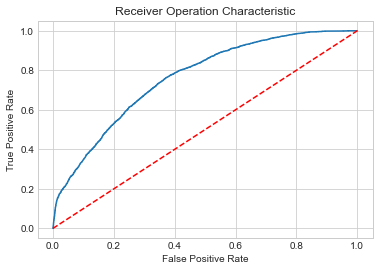

In [73]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test,decision_scores)
plt.title('Receiver Operation Characteristic')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')  # 画对角线有点特殊，记住即可
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()